# Dataframes Kung-fu with Pandas

<img style="float: right;" src="data/po.png" width=256>
**TL;DR**
- Read CSVs into dataframes
- Explore dataframe and show statistics
- Indexing and slicing
- Find and replace

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading a CSV into dataframe
df = pd.read_csv('data/Major-AI-projects.csv')

# Show column names and number of rows
cols = df.columns.values.tolist()
rows = df.index
print('cols:\n{}\n'.format(', '.join(cols)))
print('num_rows:\n{}\n'.format(len(rows)))

cols:
Project, Type, Category, Insitution / Company, Developer / Author / Group Lead, Location, Year, Description, Written in, Image, Wikipedia Page, Homepage or Source Code

num_rows:
54



In [3]:
# First five items of the dataframe.
df.head()

,Project,Type,Category,Insitution / Company,Developer / Author / Group Lead,Location,Year,Description,Written in,Image,Wikipedia Page,Homepage or Source Code
0,Deep Blue,Specialized Projects,Games,"IBM, Carnegie Mellon University","Feng-hsiung Hsu, Thomas Anantharaman, Murray C...",United States,1985,Deep Blue was a chess-playing computer develop...,C/C++,http://upload.wikimedia.org/wikipedia/commons/...,http://en.wikipedia.org/wiki/Deep_Blue_(chess_...,http://www-03.ibm.com/ibm/history/ibm100/us/en...
1,Stockfish AI,Specialized Projects,Games,NaN,"Tord Romstad, Marco Costalba, Joona Kiiski","Norway, Italy",2004,Stockfish is a strong open source UCI chess en...,C/C++,http://upload.wikimedia.org/wikipedia/en/thumb...,http://en.wikipedia.org/wiki/Stockfish_(chess),http://www.stockfishchess.org/
2,Google Now,Specialized Projects,Knowledge and Reasoning,Google,NaN,United States,2012,Google Now is an intelligent personal assistan...,C/C++,http://upload.wikimedia.org/wikipedia/en/thumb...,http://en.wikipedia.org/wiki/Google_Now,http://google.com/landing/now/
3,OpenCog,"Specialized Projects, Multipurpose Projects","Cognitive Architechture, Software Packages",OpenCog Foundation,Ben Goertzel,United States,2008,OpenCog is a project that aims to build an ope...,"C/C++, Python, Scheme",http://upload.wikimedia.org/wikipedia/en/thumb...,http://en.wikipedia.org/wiki/OpenCog,http://opencog.org/
4,Apache Mahout,Multipurpose Projects,Software Packages,Apache Software Foundation,"Isabel Drost, Grant Ingersoll, Karl Wettin.",United States,2010,Apache Mahout is a project of the Apache Softw...,Java,NaN,http://en.wikipedia.org/wiki/Apache_Mahout,http://mahout.apache.org/


In [4]:
# Use pandas.DataFrames.describe() to generate a descriptive statistics.
df.describe()

,Project,Type,Category,Insitution / Company,Developer / Author / Group Lead,Location,Year,Description,Written in,Image,Wikipedia Page,Homepage or Source Code
count,54,54,54,47,38,53,40,54,25,16,53,45
unique,54,3,11,38,36,13,27,54,13,16,53,45
top,RapidMiner,Specialized Projects,Cognitive Architechture,MIT,Rollo Carpenter,United States,2005,Encog is a machine learning framework availabl...,LISP,http://upload.wikimedia.org/wikipedia/commons/...,http://en.wikipedia.org/wiki/Deep_Blue_(chess_...,http://groups.csail.mit.edu/lbr/humanoid-robot...
freq,1,45,15,4,2,40,3,1,7,1,1,1


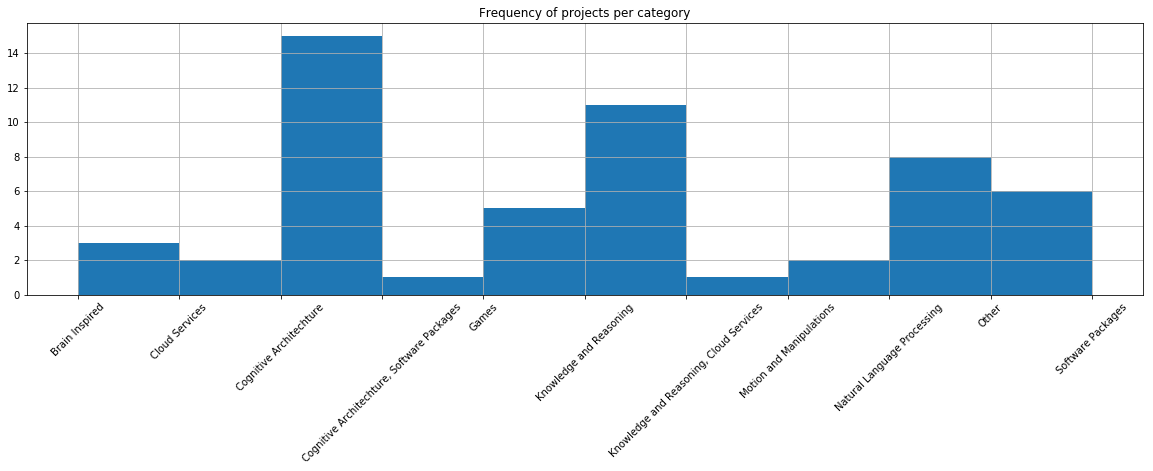

In [5]:
# Data shows the major AI projects done by different organizations.
# Let's find out the frequency of projects done for each category.
plt.figure(figsize=(20, 5))
plt.xticks(rotation=45)
df.Category.hist()
plt.title('Frequency of projects per category')
plt.show()

## Indexing like a Ninja

Guidelines:
- use `.loc` for labels
- use `.iloc` for positions
- explicitly designate both rows and columns

In [6]:
""" Select a column by name """
# We add `:` to say that we are interested in all the rows.
# We add the column name to indicate the column we are interested in.
df.loc[:, 'Project'].head(10)

0        Deep Blue
1     Stockfish AI
2       Google Now
3          OpenCog
4    Apache Mahout
5           CoJACK
6          Neuroph
7       RapidMiner
8             Weka
9            Encog
Name: Project, dtype: object

In [7]:
# Note that the previous method returns the row as a Series.
# If we are only interested in the values we can do the following which will return a numpy array.
df.loc[:, 'Project'].values

array(['Deep Blue', 'Stockfish AI', 'Google Now', 'OpenCog',
       'Apache Mahout', 'CoJACK', 'Neuroph', 'RapidMiner', 'Weka', 'Encog',
       'Watson', 'Deeplearning4j', 'PARRY', '4CAPS', 'ACT-R', 'Copycat',
       'Mycin', 'SNePS', 'Soar', 'Cyc', 'SHRDLU', 'Eurisko',
       'Artificial Linguistic Internet Computer Entity', 'ELIZA',
       'Wolfram Alpha', 'Chinook', 'Blue Brain Project', 'AIBO', 'Braina',
       'CALO', 'CHREST', 'Cleverbot', 'Cog', 'CLARION', 'DUAL', 'EPIC',
       'FORR', 'FreeHAL', 'Google Brain', 'Grok',
       'Procedural Reasoning System', 'Microsoft Cortana', 'Jabberwacky',
       'Open Mind Common Sense', 'P.A.N.', 'PreAct',
       'Synthetic Environment for Analysis and Simulations', 'R-CAST',
       'Siri', 'SYSTRAN', 'TD-Gammon', 'InfoTame', 'IDA and LIDA', 'NuPIC'], dtype=object)

In [8]:
# Till now we were using row numbers as index.
# We can specify a column to serve as index for our dataframe.
df.set_index('Project', inplace=True)

In [9]:
# Now if we want to select a particular value from the dataframe, say, which year the `Google Now` project was taken.
# We can do that easily.
df.loc['Google Now', 'Year']

'2012'

In [10]:
# Select several rows by labels - pass a list of labels in the row position.
df.loc[['Google Now', 'Deep Blue', 'Stockfish AI'], 'Year']

Project
Google Now      2012
Deep Blue       1985
Stockfish AI    2004
Name: Year, dtype: object

In [11]:
# We can also do the same for columns.
df.loc[['Google Now', 'Deep Blue', 'Stockfish AI'], ['Year', 'Written in']]

,Year,Written in
Project,,
Google Now,2012,C/C++
Deep Blue,1985,C/C++
Stockfish AI,2004,C/C++


In [12]:
# Select several consecutive columns by label.
df.loc[:, 'Category': 'Written in'].head()

,Category,Insitution / Company,Developer / Author / Group Lead,Location,Year,Description,Written in
Project,,,,,,,
Deep Blue,Games,"IBM, Carnegie Mellon University","Feng-hsiung Hsu, Thomas Anantharaman, Murray C...",United States,1985,Deep Blue was a chess-playing computer develop...,C/C++
Stockfish AI,Games,NaN,"Tord Romstad, Marco Costalba, Joona Kiiski","Norway, Italy",2004,Stockfish is a strong open source UCI chess en...,C/C++
Google Now,Knowledge and Reasoning,Google,NaN,United States,2012,Google Now is an intelligent personal assistan...,C/C++
OpenCog,"Cognitive Architechture, Software Packages",OpenCog Foundation,Ben Goertzel,United States,2008,OpenCog is a project that aims to build an ope...,"C/C++, Python, Scheme"
Apache Mahout,Software Packages,Apache Software Foundation,"Isabel Drost, Grant Ingersoll, Karl Wettin.",United States,2010,Apache Mahout is a project of the Apache Softw...,Java


In [13]:
# Select rows based on column value.
# Select all the projects that were taken in the year 2004.
df.loc[df.loc[:, 'Year'] == '2004', :]

,Type,Category,Insitution / Company,Developer / Author / Group Lead,Location,Year,Description,Written in,Image,Wikipedia Page,Homepage or Source Code
Project,,,,,,,,,,,
Stockfish AI,Specialized Projects,Games,NaN,"Tord Romstad, Marco Costalba, Joona Kiiski","Norway, Italy",2004,Stockfish is a strong open source UCI chess en...,C/C++,http://upload.wikimedia.org/wikipedia/en/thumb...,http://en.wikipedia.org/wiki/Stockfish_(chess),http://www.stockfishchess.org/
Synthetic Environment for Analysis and Simulations,Specialized Projects,Other,Purdue University,Alok R. Chaturvedi,United States,2004,Purdue University's Synthetic Environment for ...,NaN,NaN,http://en.wikipedia.org/wiki/Synthetic_Environ...,http://www.krannert.purdue.edu/centers/perc/ht...


In [14]:
# Select a row by position.
df.iloc[0, :]

Type                                                            Specialized Projects
Category                                                                       Games
Insitution / Company                                 IBM, Carnegie Mellon University
Developer / Author / Group Lead    Feng-hsiung Hsu, Thomas Anantharaman, Murray C...
Location                                                               United States
Year                                                                            1985
Description                        Deep Blue was a chess-playing computer develop...
Written in                                                                     C/C++
Image                              http://upload.wikimedia.org/wikipedia/commons/...
Wikipedia Page                     http://en.wikipedia.org/wiki/Deep_Blue_(chess_...
Homepage or Source Code            http://www-03.ibm.com/ibm/history/ibm100/us/en...
Name: Deep Blue, dtype: object

In [15]:
# Select a column by position
# Note that we are using the 'Project' column as index. So, column `Type' becomes the 0th column.
df.iloc[:, 0]

Project
Deep Blue                                                                    Specialized Projects
Stockfish AI                                                                 Specialized Projects
Google Now                                                                   Specialized Projects
OpenCog                                               Specialized Projects, Multipurpose Projects
Apache Mahout                                                               Multipurpose Projects
CoJACK                                                                       Specialized Projects
Neuroph                                                                     Multipurpose Projects
RapidMiner                                                                  Multipurpose Projects
Weka                                                                        Multipurpose Projects
Encog                                                                       Multipurpose Projects
Watson      

In [16]:
# Pick up a single value
df.iloc[0, 2]

'IBM, Carnegie Mellon University'

In [17]:
# Select several rows by position
df.iloc[[0, 1], :]

,Type,Category,Insitution / Company,Developer / Author / Group Lead,Location,Year,Description,Written in,Image,Wikipedia Page,Homepage or Source Code
Project,,,,,,,,,,,
Deep Blue,Specialized Projects,Games,"IBM, Carnegie Mellon University","Feng-hsiung Hsu, Thomas Anantharaman, Murray C...",United States,1985,Deep Blue was a chess-playing computer develop...,C/C++,http://upload.wikimedia.org/wikipedia/commons/...,http://en.wikipedia.org/wiki/Deep_Blue_(chess_...,http://www-03.ibm.com/ibm/history/ibm100/us/en...
Stockfish AI,Specialized Projects,Games,NaN,"Tord Romstad, Marco Costalba, Joona Kiiski","Norway, Italy",2004,Stockfish is a strong open source UCI chess en...,C/C++,http://upload.wikimedia.org/wikipedia/en/thumb...,http://en.wikipedia.org/wiki/Stockfish_(chess),http://www.stockfishchess.org/


In [18]:
# Select several adjacent columns by position
df.iloc[:, 0:3].head()

,Type,Category,Insitution / Company
Project,,,
Deep Blue,Specialized Projects,Games,"IBM, Carnegie Mellon University"
Stockfish AI,Specialized Projects,Games,NaN
Google Now,Specialized Projects,Knowledge and Reasoning,Google
OpenCog,"Specialized Projects, Multipurpose Projects","Cognitive Architechture, Software Packages",OpenCog Foundation
Apache Mahout,Multipurpose Projects,Software Packages,Apache Software Foundation


In [19]:
# Search and replace a value.
# Replace all the NaNs in `Written in` column with `Unknown`.
df.loc[:, 'Written in'].replace(np.nan, 'Unknown')

Project
Deep Blue                                                             C/C++
Stockfish AI                                                          C/C++
Google Now                                                            C/C++
OpenCog                                               C/C++, Python, Scheme
Apache Mahout                                                          Java
CoJACK                                                                 Java
Neuroph                                                                Java
RapidMiner                                                             Java
Weka                                                                   Java
Encog                                                     Java, .Net, C/C++
Watson                                                  Java, C/C++, Prolog
Deeplearning4j                                                   Java, CUDA
PARRY                                                                  LISP
4CAP